# Trabalho Quantum Finance        

Curso: Data Science and Artificial Intelligence - 9DTSR

Disciplina: Feature Engineering 

Data: 2024

Prof.: Filipe Pacheco

Grupo(RMs): 357385, 358416, 357198, 358440

# 1 Importação das Bibliotecas Necessárias

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
from sklearn.model_selection import train_test_split


# 2 Carregar o Dataset

In [69]:
df = pd.read_csv('Base_ScoreCredito_QuantumFinance.csv', delimiter=';', decimal=',')

# 3 Análise Exploratória de Dados (EDA) - Básica

## 3.1 Sumarização Estatística

In [70]:
df.head()

,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
0,708082083,45,F,casado,graduacao,3,40,1,40.089665,3,0,0,1,1,778.0
1,708083283,58,M,solteiro,ensino fundam,0,44,1,66.557645,3,0,0,1,0,276.3
2,708084558,46,M,divorciado,doutorado,3,35,1,123.681821,6,0,0,1,1,401.0
3,708085458,34,F,solteiro,mestrado,0,22,1,19.715934,6,0,0,1,0,347.4
4,708086958,49,F,casado,mestrado,2,36,0,0.000000,3,1,437,1,2,476.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10127 non-null  int64  
 1   idade                10127 non-null  int64  
 2   sexo                 10127 non-null  object 
 3   estado_civil         10127 non-null  object 
 4   escola               10127 non-null  object 
 5   Qte_dependentes      10127 non-null  int64  
 6   tempo_ultimoservico  10127 non-null  int64  
 7   trabalha             10127 non-null  int64  
 8   vl_salario_mil       10127 non-null  float64
 9   reg_moradia          10127 non-null  int64  
 10  casa_propria         10127 non-null  int64  
 11  vl_imovel_em_mil     10127 non-null  int64  
 12  Qte_cartoes          10127 non-null  int64  
 13  Qte_carros           10127 non-null  int64  
 14  SCORE_CREDITO        10127 non-null  float64
dtypes: float64(2), int64(10), object(3)


In [72]:
print("\n Estatísticas Descritivas")
df.describe(include='all')


 Estatísticas Descritivas


,id,idade,sexo,estado_civil,escola,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO
count,1.012700e+04,10127.000000,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,NaN,2,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,casado,ensino medio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5358,4687,3352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,46.325960,NaN,NaN,NaN,1.547447,34.133208,0.911919,70.209002,3.783450,0.352424,208.999111,1.083638,0.623383,469.500364
std,3.690378e+07,8.016814,NaN,NaN,NaN,1.489079,8.221428,0.283427,55.567032,1.580486,0.477749,378.495229,0.333784,0.569796,133.814653
min,7.080821e+08,26.000000,NaN,NaN,NaN,0.000000,7.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,162.000000
25%,7.130368e+08,41.000000,NaN,NaN,NaN,0.000000,30.000000,1.000000,21.330536,3.000000,0.000000,0.000000,1.000000,0.000000,375.000000
50%,7.179264e+08,46.000000,NaN,NaN,NaN,1.000000,34.000000,1.000000,66.486331,4.000000,0.000000,0.000000,1.000000,1.000000,449.600000
75%,7.731435e+08,52.000000,NaN,NaN,NaN,3.000000,39.000000,1.000000,107.544225,5.000000,1.000000,289.000000,1.000000,1.000000,540.900000


# Remover Duplicadas

In [73]:
df.drop_duplicates(inplace=True)

# Transformações e Normalizações    

- Excluir coluna 'id' pois não é relevante para análise

In [74]:
df.drop(columns=['id'], inplace=True)

- Substituir valores faltantes na

In [75]:
df.replace('na', np.nan, inplace=True)
df.isnull().any()

idade                  False
sexo                   False
estado_civil            True
escola                 False
Qte_dependentes        False
tempo_ultimoservico    False
trabalha               False
vl_salario_mil         False
reg_moradia            False
casa_propria           False
vl_imovel_em_mil       False
Qte_cartoes            False
Qte_carros             False
SCORE_CREDITO          False
dtype: bool

- One-Hot Encoding para variáveis categóricas

In [76]:
categorical_features = ['sexo', 'estado_civil', 'escola']   
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [77]:
df.head()

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,sexo_M,estado_civil_divorciado,estado_civil_solteiro,escola_ensino fundam,escola_ensino medio,escola_graduacao,escola_mestrado
0,45,3,40,1,40.089665,3,0,0,1,1,778.0,False,False,False,False,False,True,False
1,58,0,44,1,66.557645,3,0,0,1,0,276.3,True,False,True,True,False,False,False
2,46,3,35,1,123.681821,6,0,0,1,1,401.0,True,True,False,False,False,False,False
3,34,0,22,1,19.715934,6,0,0,1,0,347.4,False,False,True,False,False,False,True
4,49,2,36,0,0.000000,3,1,437,1,2,476.0,False,False,False,False,False,False,True


- Limpeza de dados - Tratar valores faltantes

In [78]:
df.fillna(df.median(), inplace=True)

- Normalizar dados numéricos

In [79]:
scaler = MinMaxScaler()     
numerical_features = ['idade', 'Qte_dependentes', 'tempo_ultimoservico', 'vl_salario_mil', 'reg_moradia', 'vl_imovel_em_mil', 'Qte_cartoes', 'Qte_carros']  
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [90]:
df.isnull().any()

idade                      False
Qte_dependentes            False
tempo_ultimoservico        False
trabalha                   False
vl_salario_mil             False
reg_moradia                False
casa_propria               False
vl_imovel_em_mil           False
Qte_cartoes                False
Qte_carros                 False
SCORE_CREDITO              False
sexo_M                     False
estado_civil_divorciado    False
estado_civil_solteiro      False
escola_ensino fundam       False
escola_ensino medio        False
escola_graduacao           False
escola_mestrado            False
dtype: bool

In [81]:
df.describe(include='all')

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,sexo_M,estado_civil_divorciado,estado_civil_solteiro,escola_ensino fundam,escola_ensino medio,escola_graduacao,escola_mestrado
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127,10127,10127,10127,10127,10127,10127
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5358,9379,6184,7844,6775,8033,8488
mean,0.432467,0.309489,0.542664,0.911919,0.300936,0.556690,0.352424,0.116111,0.027879,0.311692,469.500364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.170571,0.297816,0.164429,0.283427,0.238177,0.316097,0.477749,0.210275,0.111261,0.284898,133.814653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,162.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.319149,0.000000,0.460000,1.000000,0.091429,0.400000,0.000000,0.000000,0.000000,0.000000,375.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.425532,0.200000,0.540000,1.000000,0.284980,0.600000,0.000000,0.000000,0.000000,0.500000,449.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.553191,0.600000,0.640000,1.000000,0.460966,0.800000,1.000000,0.160556,0.000000,0.500000,540.900000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Boxplot do Tempo de Serviço')

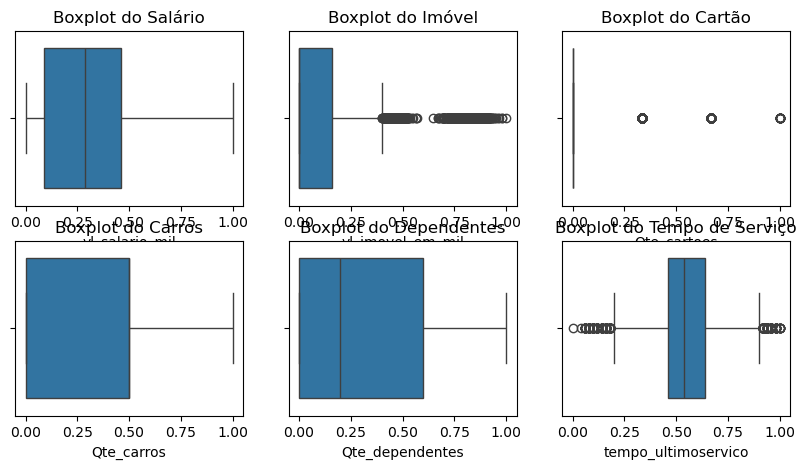

In [82]:
plt.figure(figsize=(10,5))

plt.subplot(2, 3, 1)
sns.boxplot(x=df['vl_salario_mil'])
plt.title('Boxplot do Salário')

plt.subplot(2, 3, 2)
sns.boxplot(x=df['vl_imovel_em_mil'])
plt.title('Boxplot do Imóvel')

plt.subplot(2, 3, 3)
sns.boxplot(x=df['Qte_cartoes'])
plt.title('Boxplot do Cartão')

plt.subplot(2, 3, 4)
sns.boxplot(x=df['Qte_carros'])
plt.title('Boxplot do Carros')

plt.subplot(2,3,5)
sns.boxplot(x=df['Qte_dependentes'])
plt.title('Boxplot do Dependentes')

plt.subplot(2,3,6)
sns.boxplot(x=df['tempo_ultimoservico'])
plt.title('Boxplot do Tempo de Serviço')

## Optamos por não remover outliers do número de cartões

In [83]:
valor_imovel_limit = df['tempo_ultimoservico'].quantile(0.77)
print(valor_imovel_limit)

0.66


0.2338888888888889


Text(0.5, 1.0, 'Boxplot do Tempo de Serviço')

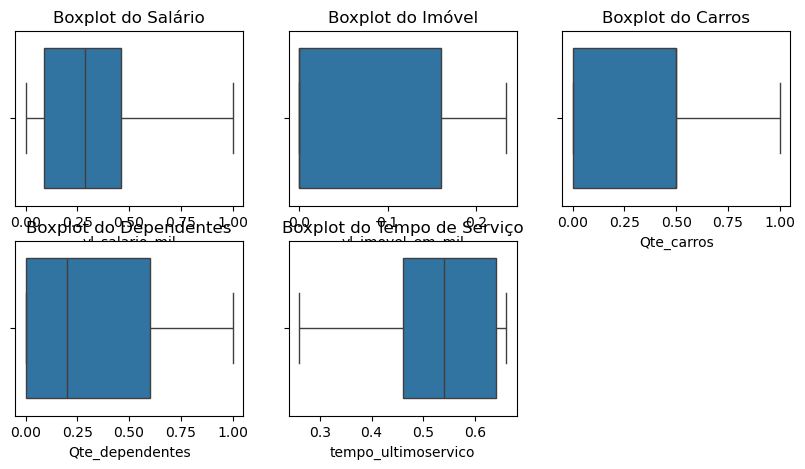

In [84]:
df_removed_outliers = df
valor_imovel_limit = df_removed_outliers['vl_imovel_em_mil'].quantile(0.80)
valor_temp_servico_min = df_removed_outliers['tempo_ultimoservico'].quantile(0.05)
valor_temp_servico_max = df_removed_outliers['tempo_ultimoservico'].quantile(0.77)

df_removed_outliers.loc[df_removed_outliers['vl_imovel_em_mil'] > valor_imovel_limit, 'vl_imovel_em_mil'] = valor_imovel_limit

df_removed_outliers.loc[(df_removed_outliers['tempo_ultimoservico'] > valor_temp_servico_max, 'tempo_ultimoservico')]  = valor_temp_servico_max
df_removed_outliers.loc[(df_removed_outliers['tempo_ultimoservico'] < valor_temp_servico_min, 'tempo_ultimoservico')]  = valor_temp_servico_min

print(valor_imovel_limit)
plt.figure(figsize=(10,5))

plt.subplot(2, 3, 1)
sns.boxplot(x=df_removed_outliers['vl_salario_mil'])
plt.title('Boxplot do Salário')

plt.subplot(2, 3, 2)
sns.boxplot(x=df_removed_outliers['vl_imovel_em_mil'])
plt.title('Boxplot do Imóvel')


plt.subplot(2, 3, 3)
sns.boxplot(x=df_removed_outliers['Qte_carros'])
plt.title('Boxplot do Carros')

plt.subplot(2,3,4)
sns.boxplot(x=df_removed_outliers['Qte_dependentes'])
plt.title('Boxplot do Dependentes')

plt.subplot(2,3,5)
sns.boxplot(x=df_removed_outliers['tempo_ultimoservico'])
plt.title('Boxplot do Tempo de Serviço')

In [85]:
df_wo_duplicates = df_removed_outliers
duplicates = df_wo_duplicates.duplicated().sum()
print(f"Total de registros duplicados: {duplicates}")

Total de registros duplicados: 0


In [86]:
df_treated = df_wo_duplicates 

scaler = StandardScaler()
df_treated[['vl_salario_mil', 'tempo_ultimoservico','vl_imovel_em_mil']] = scaler.fit_transform(df_treated[[ 'vl_salario_mil','tempo_ultimoservico','vl_imovel_em_mil']])
df_treated

,idade,Qte_dependentes,tempo_ultimoservico,trabalha,vl_salario_mil,reg_moradia,casa_propria,vl_imovel_em_mil,Qte_cartoes,Qte_carros,SCORE_CREDITO,sexo_M,estado_civil_divorciado,estado_civil_solteiro,escola_ensino fundam,escola_ensino medio,escola_graduacao,escola_mestrado
0,0.404255,0.6,1.139576,1,-0.542063,0.4,0,-0.702286,0.0,0.5,778.0,False,False,False,False,False,True,False
1,0.680851,0.0,1.139576,1,-0.065714,0.4,0,-0.702286,0.0,0.0,276.3,True,False,True,True,False,False,False
2,0.425532,0.6,0.306436,1,0.962359,1.0,0,-0.702286,0.0,0.5,401.0,True,True,False,False,False,False,False
3,0.170213,0.0,-1.859727,1,-0.908732,1.0,0,-0.702286,0.0,0.0,347.4,False,False,True,False,False,False,True
4,0.489362,0.4,0.473064,0,-1.263563,0.4,1,1.662032,0.0,1.0,476.0,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0.510638,0.0,1.139576,1,0.538475,0.6,0,-0.702286,0.0,0.0,470.0,True,False,False,False,False,False,True
10123,0.255319,0.0,-0.360076,1,0.352690,1.0,0,-0.702286,0.0,0.5,432.0,True,False,True,True,False,False,False
10124,0.489362,0.6,1.139576,1,-0.907232,0.4,1,0.712935,0.0,0.5,406.0,False,False,False,False,False,True,False
10125,0.595745,0.8,1.139576,1,2.241983,0.6,0,-0.702286,0.0,0.5,387.0,True,False,False,False,True,False,False


# Divisão em conjunto de treino e teste

In [87]:
X = df.drop(columns=['SCORE_CREDITO'])    
y = df['SCORE_CREDITO']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir os primeiros registros dos conjuntos de treino e teste

In [89]:
X_train.head(), X_test.head()

(         idade  Qte_dependentes  tempo_ultimoservico  trabalha  \
 9066  0.531915              0.0             1.139576         1   
 5814  0.468085              0.4            -0.026820         1   
 792   0.255319              0.0            -2.192982         1   
 1791  0.553191              0.0             1.139576         1   
 5011  0.659574              0.4             1.139576         1   
 
       vl_salario_mil  reg_moradia  casa_propria  vl_imovel_em_mil  \
 9066       -0.844523          0.8             0         -0.702286   
 5814        0.977171          0.8             0         -0.702286   
 792        -0.186398          0.0             1          0.566920   
 1791       -0.868761          0.8             0         -0.702286   
 5011       -0.808882          1.0             0         -0.702286   
 
       Qte_cartoes  Qte_carros  sexo_M  estado_civil_divorciado  \
 9066          0.0         0.0   False                    False   
 5814          0.0         0.0    True  